## RNN flip-flop example
This notebook demonstrates a simple example RNN that is designed to implement a simple 3-bit flip-flop.

In [5]:
# Setup environment and import standard modules
import sys
import os
import datetime
import numpy as np
import pandas as pd

# Import numerical libraries
import sklearn as skl
from sklearn import linear_model, metrics
import tensorflow as tf
from tensorflow import keras
print('Tensorflow version: {}'.format(tf.__version__))

# Set up plotting (inline)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Autoreload (see https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html)
%load_ext autoreload
%autoreload 2

# Setup paths and import custom modules
modules_dir = '/Users/alandegenhart/Documents/GitHub/python/modules/'
sys.path.append(modules_dir)
import plottools as pt

# Import any local modules (in the local directory)
# NOTE: the working directory in VS Code is the current directory
# when the Jupyter server is started
import rnn_flipflop as rnnff

Tensorflow version: 2.0.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data shape: (10, 100, 3)


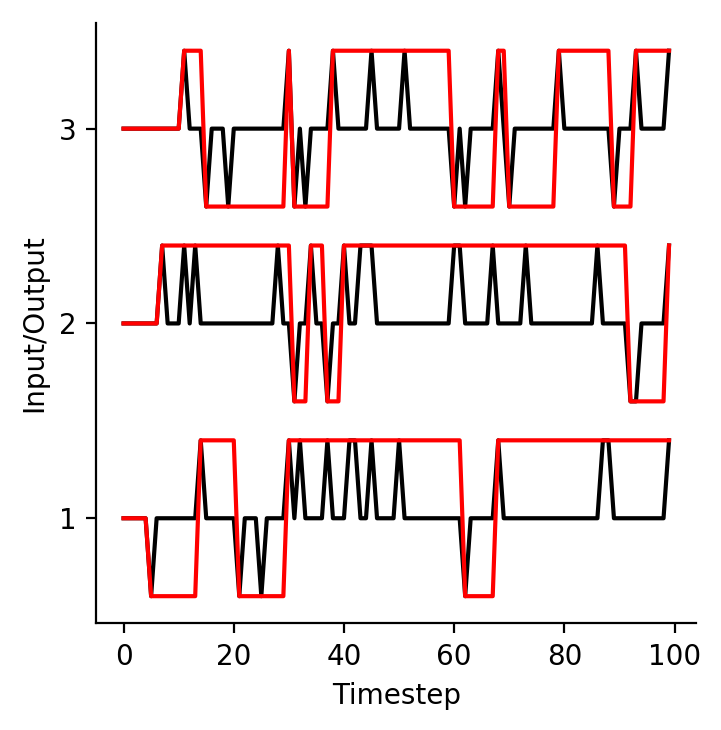

In [6]:
# Define system parameters and generate training data
n_inputs = 3
n_ts = 100  # Number of steps per sequence
n_seq = 10  # Number of sequences to generate
X, Y = rnnff.gen_training_ex(n_inputs, n_ts, n_seq)
rnnff.plot_training_ex(X[0, :, :].T, Y[0, :, :].T, 'ExampleTrainingData')
print('Data shape: {}'.format(X.shape))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, None, 128)         16896     
_________________________________________________________________
dense_6 (Dense)              (None, None, 3)           387       
Total params: 17,283
Trainable params: 17,283
Non-trainable params: 0
_________________________________________________________________
Predicted data shape: (10, 100, 3)


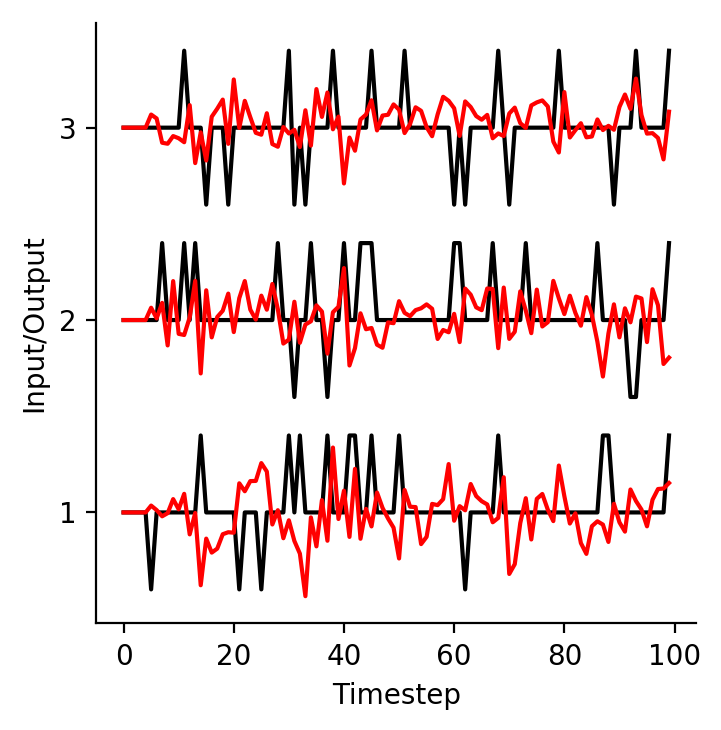

In [78]:
# Build the model
n_rnn = 128
model = rnnff.build_model(n_inputs, n_rnn, use_regularizer=False)
model.build()
model.summary()

# Now try running some test data through to get the output
Y_predict = model.predict(X)
print('Predicted data shape: {}'.format(Y_predict.shape))
rnnff.plot_training_ex(X[0, :, :].T, Y_predict[0, :, :].T, 'PreTraining')



....................................................................................................

....................................................................................................

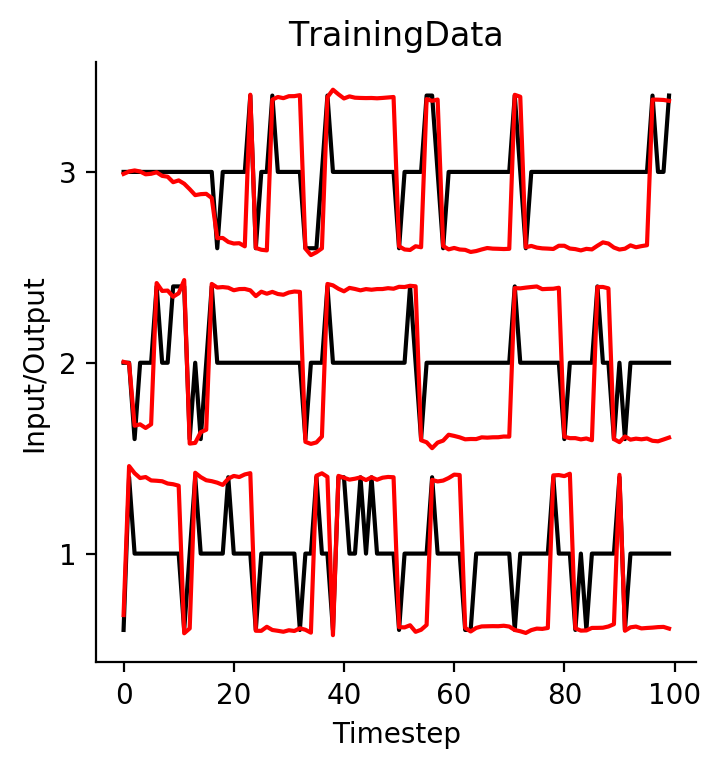

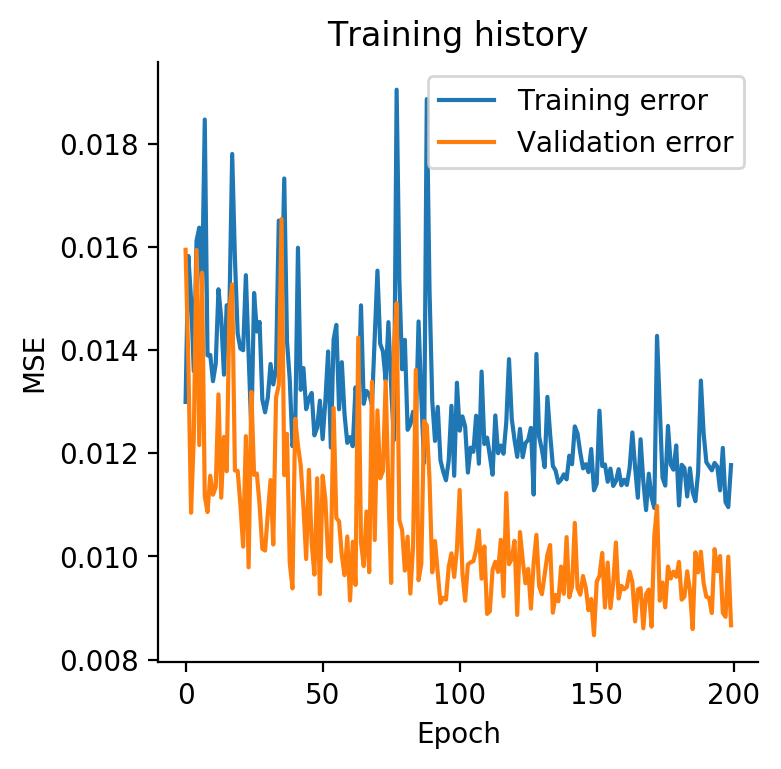

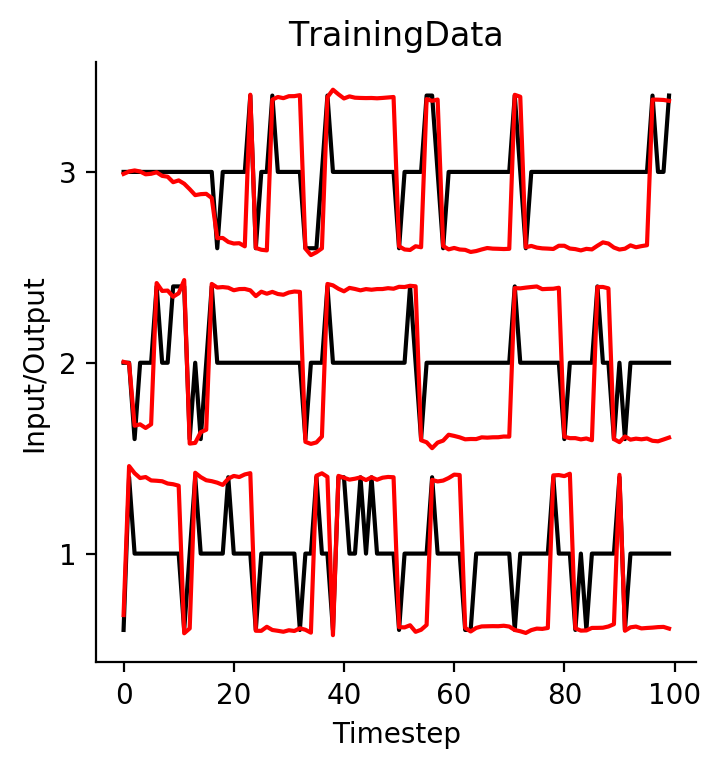

In [110]:
# Generate training data
n_seq = 500
X_train, Y_train = rnnff.gen_training_ex(n_inputs, n_ts, n_seq)

# Fit the model
EPOCHS = 200
history = model.fit(
    X_train, Y_train,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[rnnff.PrintDot()])

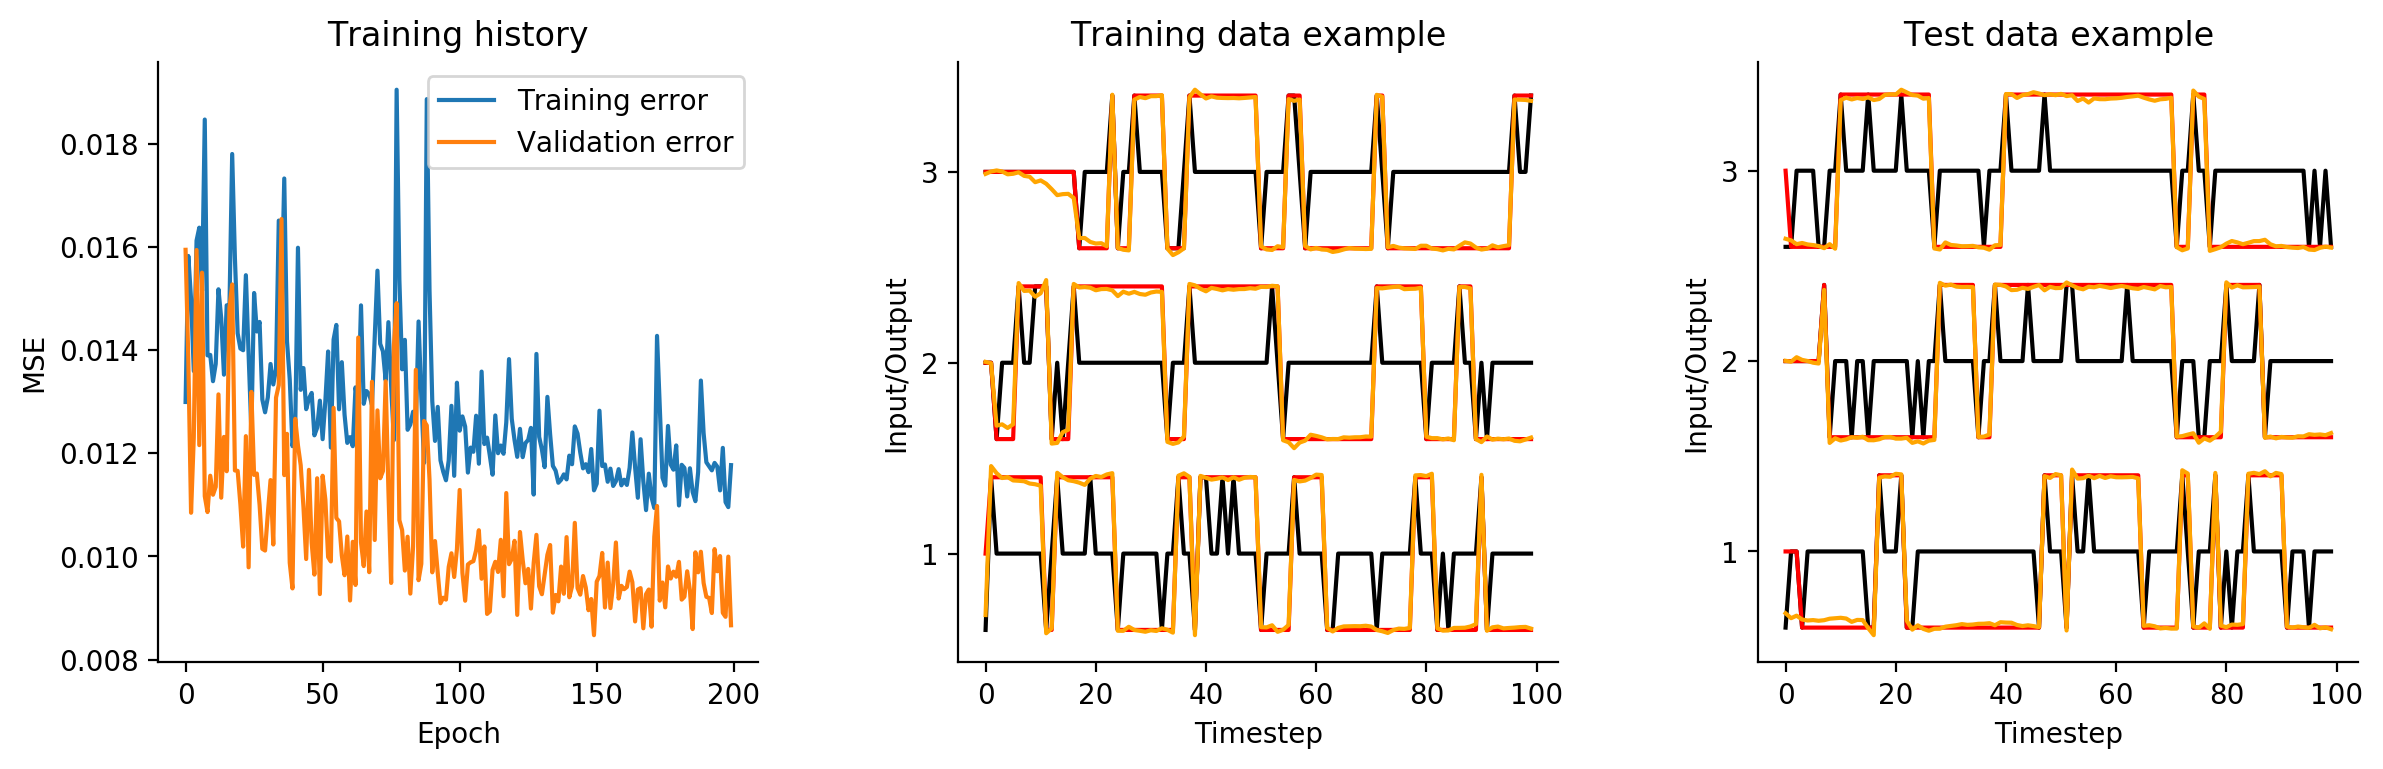

In [119]:
# --- Plot training results ---

# Setup figure
fh, axh = pt.create_subplot(n_row=1, n_col=3)

# Plot training and validation error
_ = rnnff.plot_history(history, axh=axh[0])

# Predict the training data (predicted)
Y_train_predict = model.predict(X_train)
_ = rnnff.plot_training_ex(
    X_train[0, :, :].T,
    Y_train[0, :, :].T,
    Y_train_predict[0, :, :].T,
    'Training data example',
    axh=axh[1])

# Create new held-out data and predict
X_test, Y_test = rnnff.gen_training_ex(n_inputs, n_ts, 20)
Y_test_predict = model.predict(X_test)
rnnff.plot_training_ex(
    X_test[0, :, :].T,
    Y_test[0, :, :].T,
    Y_test_predict[0, :, :].T,
    'Test data example',
    axh=axh[2]
)

# Save results
fh.savefig('results/FlipFlopRNN_{}.pdf'.format('TrainingResults'))

At this point the model is doing what we expect.  Now we can get activity of the hidden layers.

See https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0 for more information on getting the outputs of individual layers in the model.  In general, it appears that it might be easier to use the 'Model' base class to generate models rather than the 'Sequence' class (which inherits from the 'Model' class).

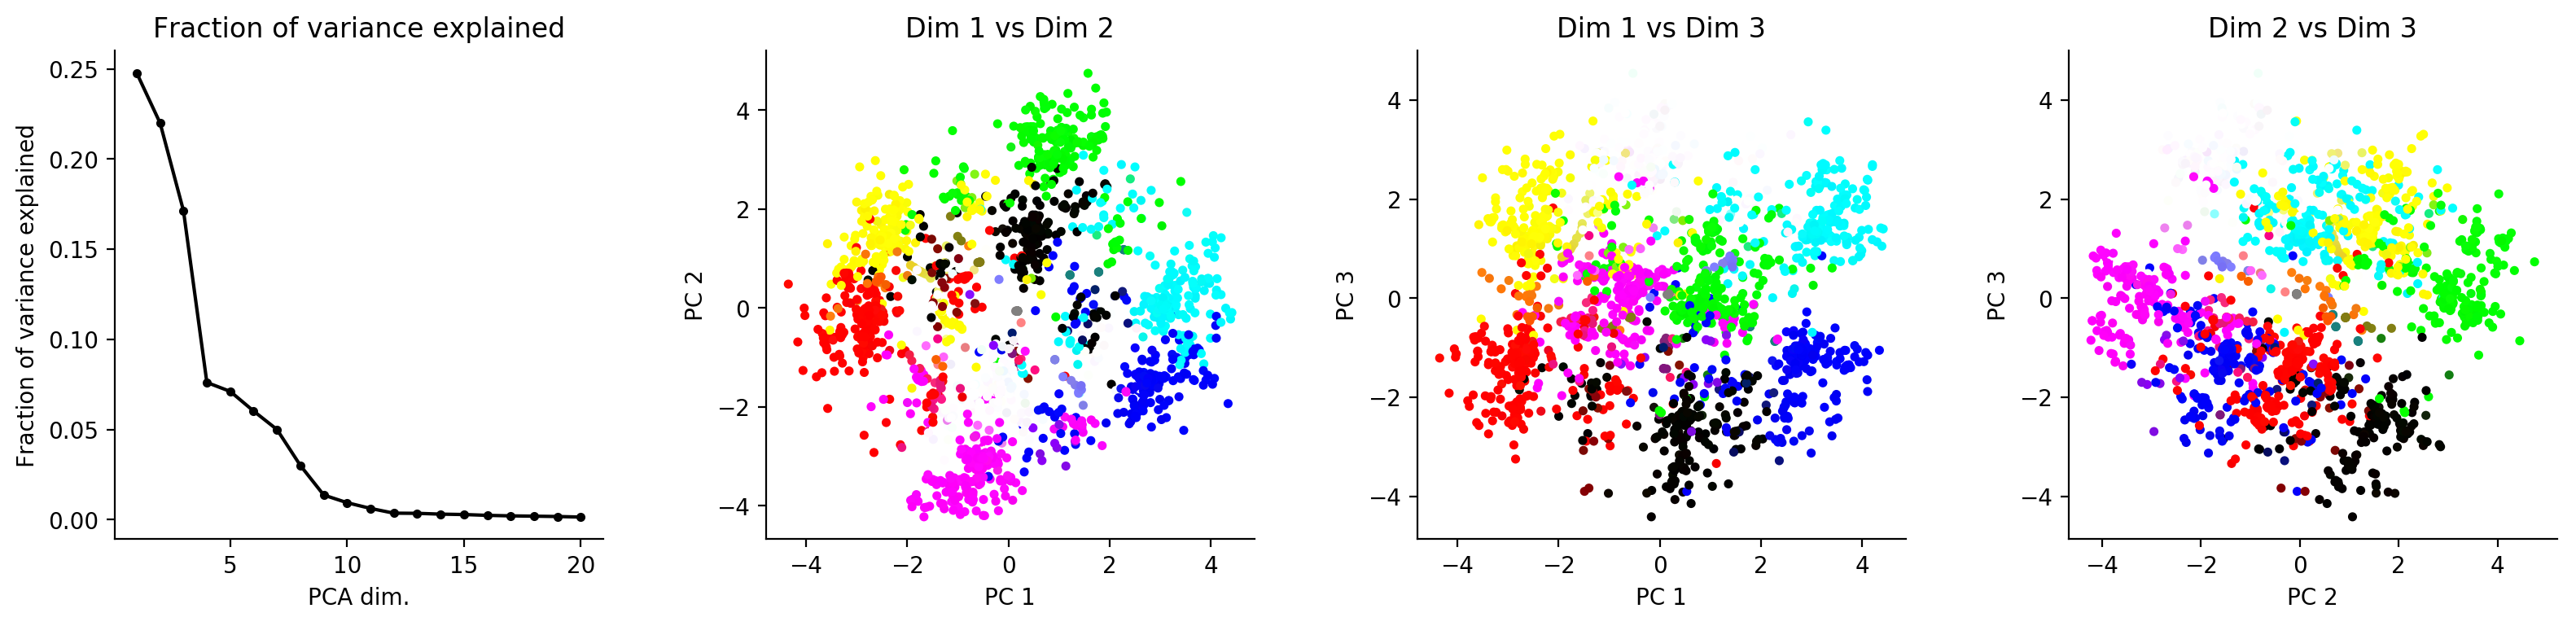

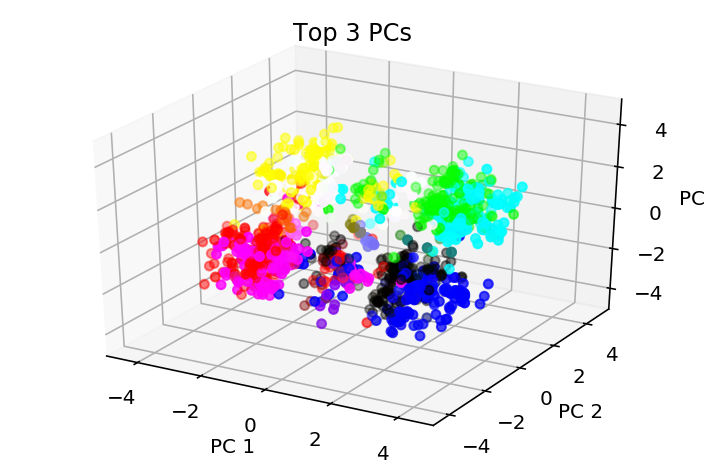

In [155]:
# Run PCA analysis
rnnff.pca_analysis(model, X_new)

It seems that PCA isn't giving the cleanest representation here.  For this task, it should be the case that the low-d representation should be 3-dimensional.  It would be good to look at the eigenspectrum to see how much variance is being explained by the various dimensions.
- Other recurrent networks (GRU, LSTM)